In [1]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Load dataset
from astroNN.datasets import galaxy10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [2]:
images, labels = galaxy10.load_data()
images = images.astype('float32') / 255.0
labels = to_categorical(labels, num_classes=10)
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

C:\Users\ddaga\.astroNN\datasets\Galaxy10_DECals.h5 was found!


In [3]:
def create_model(filters1=32, kernel_size1=3, filters2=64, kernel_size2=3, filters3=128, kernel_size3=3, learning_rate=0.001):
    model = Sequential([
        Conv2D(filters1, (kernel_size1, kernel_size1), activation='relu', input_shape=(256, 256, 3)),
        Conv2D(filters2, (kernel_size2, kernel_size2), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(filters3, (kernel_size3, kernel_size3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),  # Dense layer fixed to 128 neurons
        Dense(128, activation='relu'),  # Dense layer fixed to 128 neurons
        Dense(128, activation='relu'),  # Dense layer fixed to 128 neurons
        Dense(10, activation='softmax')  # Output layer for 10 classes
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [5]:
# Wrap the model with KerasClassifier, do not set epochs and batch_size here, set them in GridSearchCV
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),             
    Flatten(),
    Dense(128, activation='relu'),         
    Dense(128, activation='relu'),               
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

d:\Projects\galaxy-classifier\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 252, 252, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 124, 124, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 492032)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    62,980,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,107,786 (240.74 MB)

 Trainable params: 63,107,786 (240.74 MB)

 Non-trainable params: 0 (0.00 B)

In [1]:


# Define the grid search parameters, note the 'model__' prefix
param_grid = {
    'model__filters1': [32, 64],
    'model__kernel_size1': [3],
    'model__filters2': [64, 128],
    'model__kernel_size2': [3],
    'model__filters3': [128, 256],
    'model__kernel_size3': [3],
    'model__learning_rate': [0.001, 0.01]
}

# Create GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3, verbose=1)
grid_result = grid.fit(train_images, train_labels)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in zip(grid_result.cv_results_['params'], grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score']):
    print("%f (%f) with: %r" % (mean_score, scores, params))

NameError: name 'KerasClassifier' is not defined

In [ ]:
test_predictions = grid_result.best_estimator_.predict(test_images)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print("Accuracy on test data: {:.2f}%".format(accuracy * 100))

Accuracy on test data: 23.42%


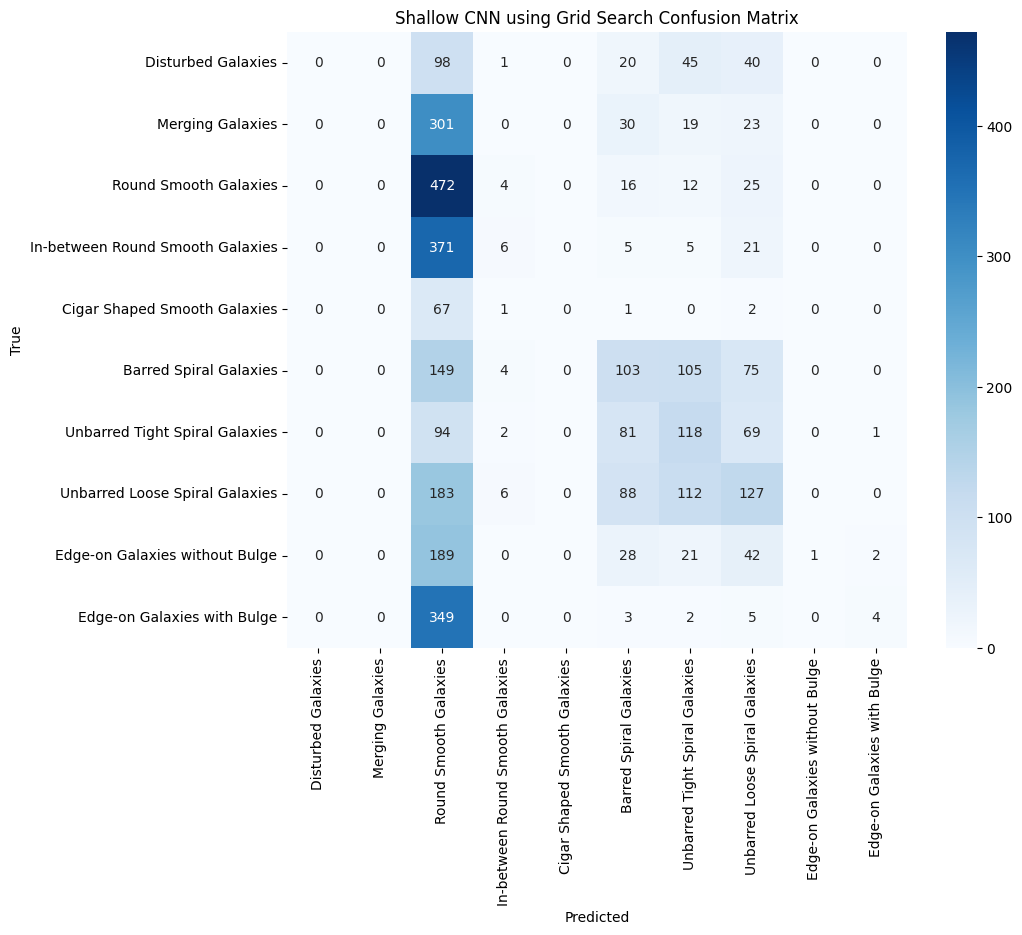

In [ ]:
predictions = grid_result.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

galaxy_classes = [
    "Disturbed Galaxies",
    "Merging Galaxies",
    "Round Smooth Galaxies",
    "In-between Round Smooth Galaxies",
    "Cigar Shaped Smooth Galaxies",
    "Barred Spiral Galaxies",
    "Unbarred Tight Spiral Galaxies",
    "Unbarred Loose Spiral Galaxies",
    "Edge-on Galaxies without Bulge",
    "Edge-on Galaxies with Bulge"
]

# Assuming test_labels are one-hot encoded, get the true classes
true_classes = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=galaxy_classes, yticklabels=galaxy_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Deep CNN using Grid Search Confusion Matrix')
plt.show()